In [1]:
import numpy as np

# Import Qiskit
from qiskit import IBMQ, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
%matplotlib inline

In [2]:
def qcomp_3b(a, b, r, anc):
    '''
    a  : 3-bit qreg
    b  : 3-bit qreg
    r  : 1-bit result 1 if a > b otherwise 0
    anc: 4-bit qreg 
    return new circuit
    '''
    # TODO: checking for number of bits
    cmp = QuantumCircuit(a, b, r, anc)
    cmp.ccx(a[0], b[0], anc[0]) # 1
    cmp.ccx(a[1], b[1], anc[1]) # 2
    cmp.x(b[0])               # 3
    cmp.ccx(a[0], b[0], r[0]) # r
    cmp.x(a[0])               # 4
    cmp.ccx(a[0], b[0], anc[0]) # 5
    cmp.x(b[1])               # 6
    cmp.ccx(a[1], b[1], anc[2]) # 7
    cmp.ccx(anc[0], anc[2], r[0]) # r
    cmp.ccx(a[1], b[1], anc[2]) # -7
    cmp.x(a[1])               # 8
    cmp.ccx(a[1], b[1], anc[1]) # 9
    cmp.ccx(anc[0], anc[1], anc[3]) # 10
    cmp.x(b[2])               # 11
    cmp.ccx(a[2], b[2], anc[2]) # 12
    cmp.ccx(anc[2], anc[3], r)    # r
    cmp.ccx(a[2], b[2], anc[2]) # -12
    cmp.x(b[2])               # -11
    cmp.ccx(anc[0], anc[1], anc[3]) # -10
    cmp.ccx(a[1], b[1], anc[1]) # -9
    cmp.x(a[1])               # -8
    cmp.x(b[1])               # -6
    cmp.ccx(a[0], b[0], anc[0]) # -5
    cmp.x(a[0])               # -4
    cmp.x(b[0])               # -3
    cmp.ccx(a[1], b[1], anc[1]) # -2
    cmp.ccx(a[0], b[0], anc[0]) # -1
    return cmp

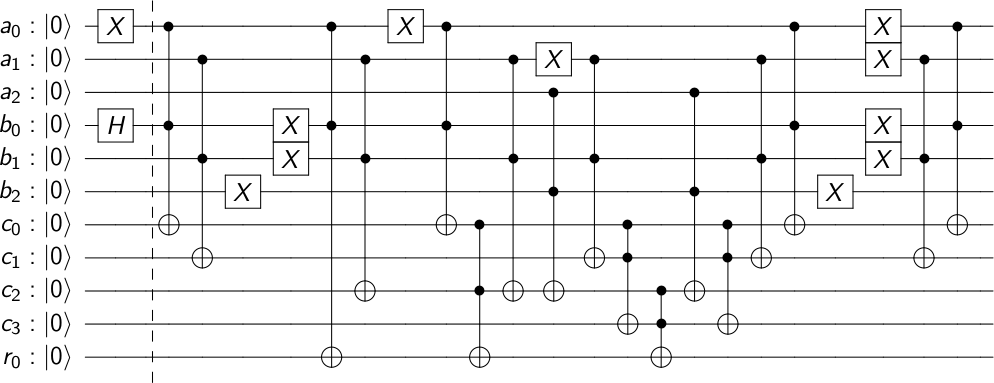

In [3]:
# testing blocks

a = QuantumRegister(3, 'a')
b = QuantumRegister(3, 'b')
anc = QuantumRegister(4, 'c')
r = QuantumRegister(1, 'r')
qc = QuantumCircuit(a, b, anc, r)

qcmp = qcomp_3b(a, b, r, anc)

qc.x(a[0])
qc.h(b[0])
qc.barrier()

# qcmp2 = qcomp_3b(a, b, anc)

qc_ = qc + qcmp

qc_.draw(output='latex', scale=0.5)


In [4]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

Making device with noise models

In [5]:
# Load IBMQ account
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
device = provider.get_backend('ibmq_16_melbourne')
properties = device.properties()
coupling_map = device.configuration().coupling_map